In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1 = pd.read_csv('user_data.csv')

In [3]:
df2=pd.read_csv('logs.csv')

In [7]:
df1.shape

client     int64
premium     bool
age        int64
dtype: object

In [6]:
df2.shape

(4500, 4)

In [8]:
df1.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [9]:
df1

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [10]:
df2.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [11]:
df2

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [12]:
df2.platform.nunique()

3

In [50]:
result = df2.query('success == True').groupby(['client', 'success'], as_index = False) \
.agg({'success':'count'}).rename(columns={'success':'counts'}) \
.sort_values(['client', 'counts'], ascending = [True, False])
max_count = result['counts'].max()

In [51]:
max_count

41

In [52]:
top_clients = result[result['counts'] == max_count]

In [54]:
top_clients

,client,counts
332,12179,41
810,28719,41
1020,36165,41
1487,52870,41
1758,61468,41
1759,61473,41
2231,78349,41
2345,82563,41
2626,92584,41


In [56]:
df2.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [57]:
result2 = df2.query('success == True') \
.groupby(['success', 'platform'], as_index=False) \
.agg({'success':'count'})

In [58]:
result2

,platform,success
0,computer,1090
1,phone,2019
2,tablet,180


In [59]:
df1_df2 = df1.merge(df2, on = 'client')

In [60]:
df1_df2

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [61]:
result3 = df1_df2.query('success == True & premium == True' ) \
.groupby(['premium', 'success', 'platform'], as_index=False) \
.agg({'success':'count'})

In [62]:
result3

,premium,platform,success
0,True,computer,108
1,True,phone,177
2,True,tablet,18


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


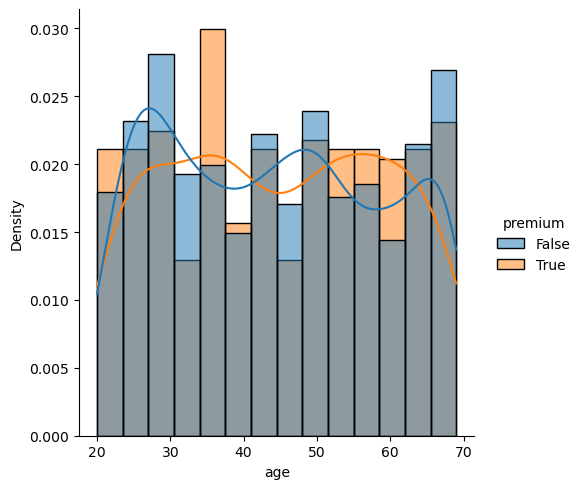

In [78]:
sns.displot(data = df1_df2, x = 'age', hue = 'premium', kde=True, stat='density', common_norm=False, bins = 14)

In [66]:
df1_df2.dtypes

client       int64
premium       bool
age          int64
success       bool
platform    object
time         int64
dtype: object

In [69]:
print(df1_df2['premium'].isnull().sum())

0


In [80]:
x = df1_df2.query('success == True')

In [81]:
x

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
5,78605,False,36,True,tablet,1585430330
8,77451,False,49,True,phone,1585444298
...,...,...,...,...,...,...
3432,53774,True,50,True,phone,1585422804
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218


In [82]:
result

,client,counts
0,40,1
1,50,1
2,75,1
3,81,1
4,132,1
...,...,...
2840,99926,1
2841,99927,1
2842,99931,1
2843,99973,1


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


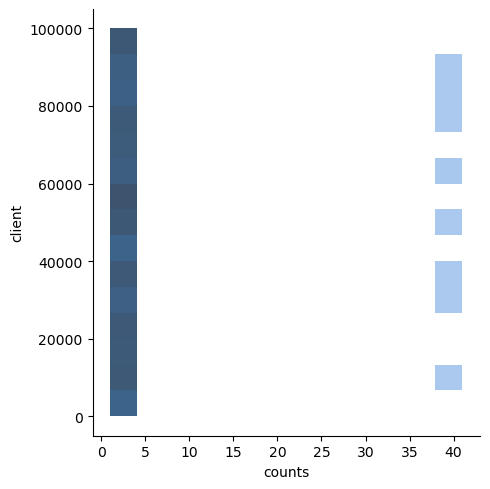

In [84]:
sns.displot(data = result, x = 'counts', y = 'client')

In [87]:
df1_df2

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [115]:
last_result = df1_df2.query("success == True & platform == 'computer'") \
.groupby(['client', 'age']) \
.agg({'success':'count'}) \
.rename(columns={'success':'counts'}) \
.reset_index()

In [116]:
last_result

,client,age,counts
0,164,37,1
1,405,37,1
2,991,69,1
3,995,28,1
4,1057,65,1
...,...,...,...
713,99592,35,1
714,99636,44,1
715,99864,26,1
716,99868,39,1


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='age', ylabel='count'>

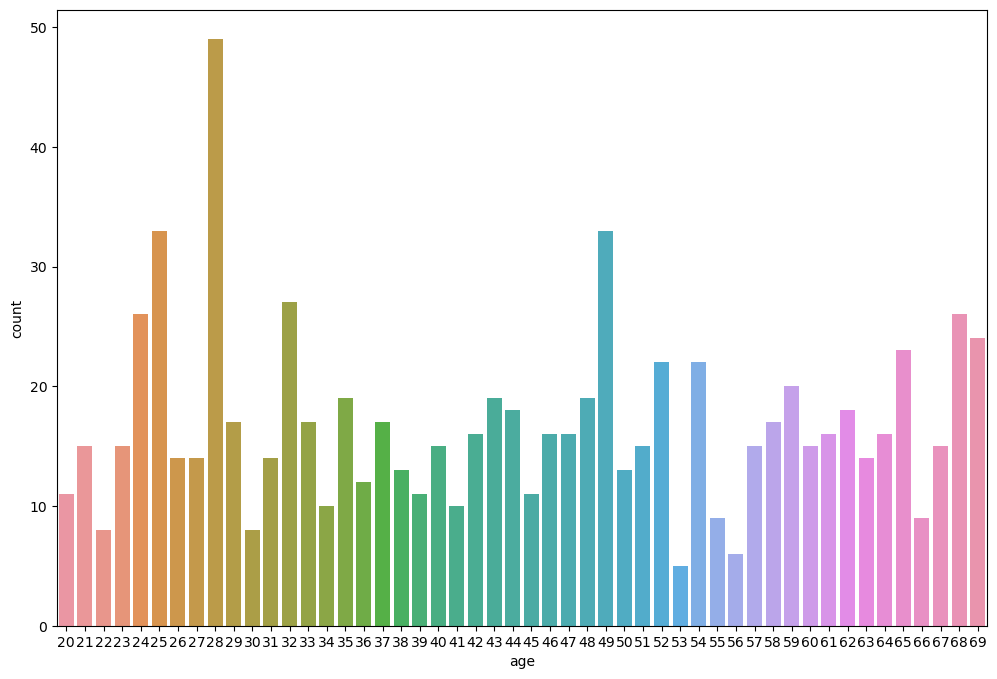

In [152]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df1_df2.loc[(df1_df2.success == True) & (df1_df2.platform == 'computer')], x ='age')
